In [1]:
from neuralike.NeuralNet import NeuralNet
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib.collections import PathCollection
from matplotlib.legend_handler import HandlerPathCollection, HandlerLine2D
# plt.style.use('ggplot')
plt.style.use('seaborn-dark-palette')
# %matplotlib inline
# matplotlib.use('nbagg')
# %matplotlib notebook
# %matplotlib qt 

In [2]:
wdir = "chains/"
chain_lcdm_hd = "LCDM_phy_HD_nested_dynesty_multi_1.txt"

In [3]:
data = np.loadtxt(wdir+chain_lcdm_hd)

In [4]:
samples = data[:,2:5]
likes = data[:,1]
len(likes)

98472

Text(0.5, 1.0, '$2\\;logL$')

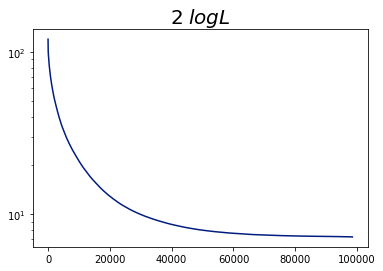

In [5]:
plt.plot(likes)
plt.yscale('log')
plt.title('$2\;logL$', fontsize=20)

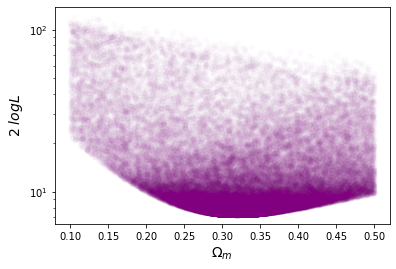

In [6]:
plt.scatter(samples[:,0],likes, linewidth=1e-5, alpha=0.02, c='purple')
plt.xlabel('$\Omega_m$', fontsize=14)
plt.ylabel(r'$2\;logL$', fontsize=14)
plt.yscale('log')

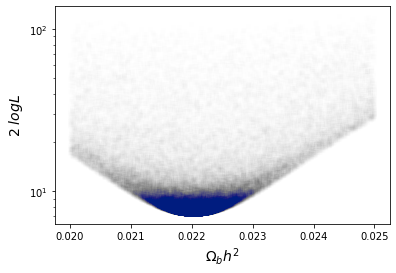

In [7]:
plt.scatter(samples[:,1],likes, linewidth=1e-7, alpha=0.005)
plt.xlabel('$\Omega_bh^2$', fontsize=14)
plt.ylabel(r'$2\;logL$', fontsize=14)
plt.yscale('log')

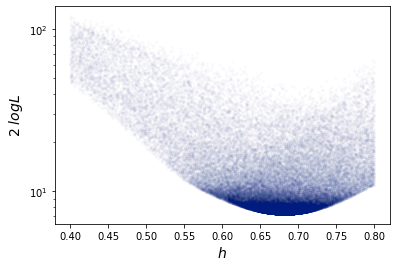

In [8]:
plt.scatter(samples[:,2],likes,marker='.', linewidth=1e-5, alpha=0.02)
plt.xlabel('$h$', fontsize=14)
plt.ylabel(r'$2\;logL$', fontsize=14)
plt.yscale('log')

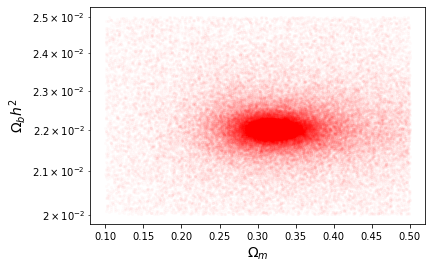

In [9]:
plt.scatter(samples[:,0],samples[:,1], marker='.', linewidth=1e-5, alpha=0.02, c='r')
plt.xlabel('$\Omega_m$', fontsize=14)
plt.ylabel(r'$\Omega_bh^2$', fontsize=14)
plt.yscale('log')
# plt.xscale('log')

Text(0, 0.5, '$h$')

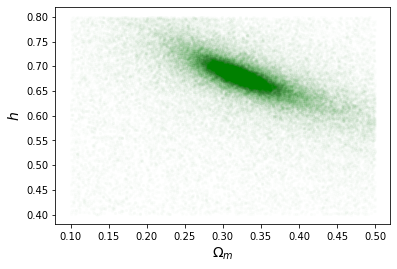

In [10]:
plt.scatter(samples[:,0],samples[:,2], marker='.', linewidth=1e-5, alpha=0.01, c='g')
plt.xlabel('$\Omega_m$', fontsize=14)
plt.ylabel(r'$h$', fontsize=14)

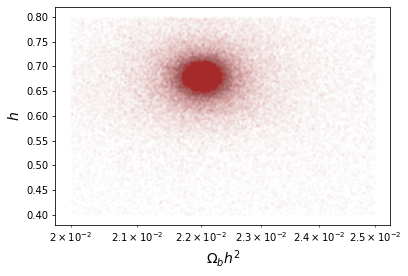

In [11]:
plt.scatter(samples[:,1],samples[:,2], marker='.', linewidth=1e-5, alpha=0.01, c='brown')
plt.xlabel('$\Omega_b h^2$', fontsize=14)
plt.ylabel(r'$h$', fontsize=14)
plt.xscale('log')

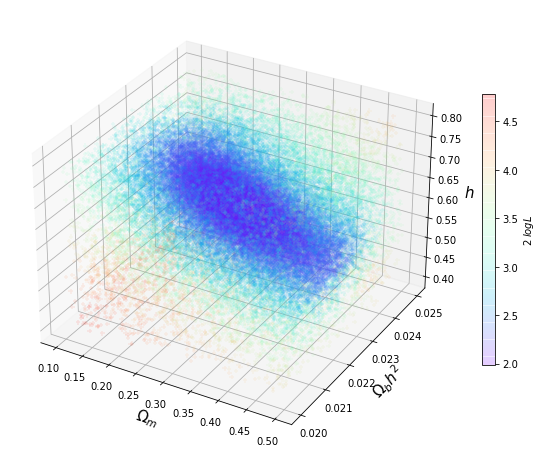

In [12]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(samples[:,0],samples[:,1], samples[:,2], marker='+', c=np.log(likes), cmap='rainbow', alpha=0.1)
ax.set_xlabel('$\Omega_m$', fontsize=15)
ax.set_ylabel('$\Omega_bh^2$', fontsize=15)
ax.set_zlabel('$h$', fontsize=15)
plt.colorbar(p,shrink=0.5, label='$2\;logL$')

In [13]:
# network = NeuralNet(samples, likes, [3, 100,100,1], epochs=200, batch_size=32,\
#                     learrning_rate=1e-5)
# funciona bien para 50mil muestras

In [31]:
network = NeuralNet(X=samples, Y=likes, topology=[3, 100,100, 200, 1], epochs=300, batch_size=64,\
                    learrning_rate=1e-4)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               400       
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 201       
Total params: 30,901
Trainable params: 30,901
Non-trainable params: 0
_________________________________________________________________


In [32]:
network.train()

Training neural network...
Epoch 1/300
1231/1231 [==============================] - 1s 786us/step - loss: 198.0497 - val_loss: 133.5228
Epoch 2/300
1231/1231 [==============================] - 1s 744us/step - loss: 130.1172 - val_loss: 128.2822
Epoch 3/300
1231/1231 [==============================] - 1s 742us/step - loss: 121.7700 - val_loss: 110.8220
Epoch 4/300
1231/1231 [==============================] - 1s 738us/step - loss: 92.7044 - val_loss: 37.0189
Epoch 5/300
1231/1231 [==============================] - 1s 747us/step - loss: 29.4560 - val_loss: 19.0507
Epoch 6/300
1231/1231 [==============================] - 1s 745us/step - loss: 17.6649 - val_loss: 16.3552
Epoch 7/300
1231/1231 [==============================] - 1s 731us/step - loss: 14.9027 - val_loss: 13.3350
Epoch 8/300
1231/1231 [==============================] - 1s 727us/step - loss: 12.0795 - val_loss: 10.3125
Epoch 9/300
1231/1231 [==============================] - 1s 759us/step - loss: 9.5084 - val_loss: 8.6522
Epoch 

Epoch 78/300
1231/1231 [==============================] - 1s 732us/step - loss: 6.3605 - val_loss: 6.3397
Epoch 79/300
1231/1231 [==============================] - 1s 735us/step - loss: 6.3590 - val_loss: 6.2392
Epoch 80/300
1231/1231 [==============================] - 1s 719us/step - loss: 6.0107 - val_loss: 6.1587
Epoch 81/300
1231/1231 [==============================] - 1s 705us/step - loss: 6.2005 - val_loss: 6.5061
Epoch 82/300
1231/1231 [==============================] - 1s 722us/step - loss: 6.0719 - val_loss: 6.1625
Epoch 83/300
1231/1231 [==============================] - 1s 704us/step - loss: 6.0684 - val_loss: 6.0364
Epoch 84/300
1231/1231 [==============================] - 1s 725us/step - loss: 6.1063 - val_loss: 6.1325
Epoch 85/300
1231/1231 [==============================] - 1s 731us/step - loss: 5.9692 - val_loss: 5.9695
Epoch 86/300
1231/1231 [==============================] - 1s 737us/step - loss: 6.0713 - val_loss: 5.9783
Epoch 87/300
1231/1231 [======================

Epoch 155/300
1231/1231 [==============================] - 1s 745us/step - loss: 0.3456 - val_loss: 0.2910
Epoch 156/300
1231/1231 [==============================] - 1s 731us/step - loss: 0.3141 - val_loss: 0.2781
Epoch 157/300
1231/1231 [==============================] - 1s 743us/step - loss: 0.2779 - val_loss: 0.2433
Epoch 158/300
1231/1231 [==============================] - 1s 735us/step - loss: 0.2480 - val_loss: 0.2040
Epoch 159/300
1231/1231 [==============================] - 1s 730us/step - loss: 0.2270 - val_loss: 0.2000
Epoch 160/300
1231/1231 [==============================] - 1s 748us/step - loss: 0.2156 - val_loss: 0.2325
Epoch 161/300
1231/1231 [==============================] - 1s 745us/step - loss: 0.1956 - val_loss: 0.1673
Epoch 162/300
1231/1231 [==============================] - 1s 736us/step - loss: 0.1709 - val_loss: 0.1865
Epoch 163/300
1231/1231 [==============================] - 1s 763us/step - loss: 0.1672 - val_loss: 0.1284
Epoch 164/300
1231/1231 [============

1231/1231 [==============================] - 1s 733us/step - loss: 0.0214 - val_loss: 0.0169
Epoch 232/300
1231/1231 [==============================] - 1s 748us/step - loss: 0.0233 - val_loss: 0.0305
Epoch 233/300
1231/1231 [==============================] - 1s 735us/step - loss: 0.0304 - val_loss: 0.0156
Epoch 234/300
1231/1231 [==============================] - 1s 753us/step - loss: 0.0212 - val_loss: 0.0192
Epoch 235/300
1231/1231 [==============================] - 1s 750us/step - loss: 0.0258 - val_loss: 0.0152
Epoch 236/300
1231/1231 [==============================] - 1s 744us/step - loss: 0.0258 - val_loss: 0.0146
Epoch 237/300
1231/1231 [==============================] - 1s 734us/step - loss: 0.0225 - val_loss: 0.0220
Epoch 238/300
1231/1231 [==============================] - 1s 728us/step - loss: 0.0204 - val_loss: 0.0793
Epoch 239/300
1231/1231 [==============================] - 1s 747us/step - loss: 0.0221 - val_loss: 0.0143
Epoch 240/300
1231/1231 [==========================

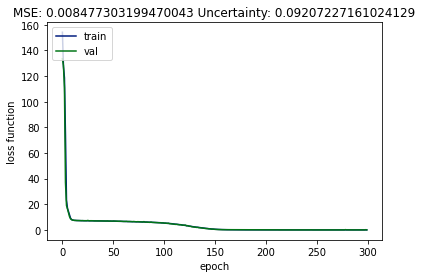

In [49]:
network.plot(ylogscale=False)

In [34]:
r = np.random.randint(len(likes)-1)
# r = np.argmin(likes)
test_sample = samples[r]

new_vector = np.array(test_sample).reshape(1,3)
# new_vector = np.array([0.7,0.5,0.5])
prediction = network.predict(new_vector)


print("Predicción: {}".format(float(prediction)))

Predicción: 11.027122497558594


In [35]:
likes[r], samples[r]

(10.763399632303933, array([0.19808045, 0.0225326 , 0.75084446]))

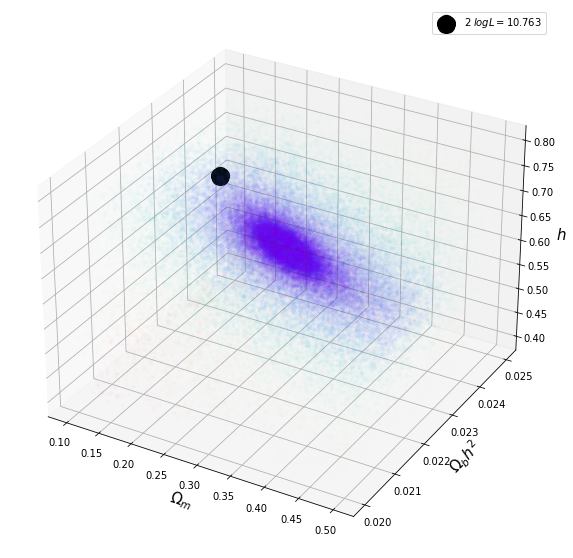

In [36]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(samples[:,0],samples[:,1], samples[:,2], marker='+', c=np.log(likes), cmap='rainbow', alpha=0.02)
ax.set_xlabel('$\Omega_m$', fontsize=15)
ax.set_ylabel('$\Omega_bh^2$', fontsize=15)
ax.set_zlabel('$h$', fontsize=15)
# plt.colorbar(p,shrink=0.5, label='$2\;logL$')
ax.scatter(samples[r][0], samples[r][1], samples[r][2], marker='*', linewidth=15, c='black',\
           alpha=1.0, label='$2\;logL={:.3f}$'.format(likes[r]))
plt.legend()

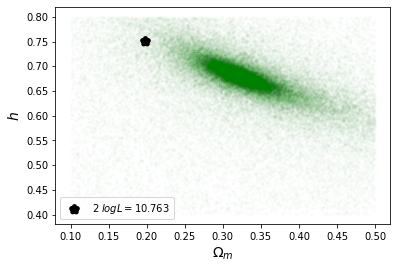

In [37]:
plt.scatter(samples[:,0],samples[:,2], marker='.', linewidth=1e-5, alpha=0.01, c='g')
plt.xlabel('$\Omega_m$', fontsize=14)
plt.ylabel(r'$h$', fontsize=14)
plt.scatter(samples[r][0], samples[r][2],marker='*', linewidth=5, c='black',\
            alpha=1.0, label='$2\;logL={:.3f}$'.format(likes[r]))
plt.legend()

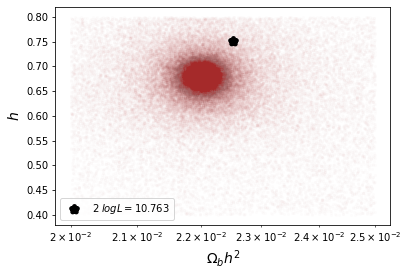

In [38]:
plt.scatter(samples[:,1],samples[:,2], marker='.', linewidth=1e-5, alpha=0.01, c='brown')
plt.xlabel('$\Omega_b h^2$', fontsize=14)
plt.ylabel(r'$h$', fontsize=14)
plt.xscale('log')
plt.scatter(samples[r][1], samples[r][2],marker='*', linewidth=5, c='black',\
            alpha=1.0, label='$2\;logL={:.3f}$'.format(likes[r]))
plt.legend()

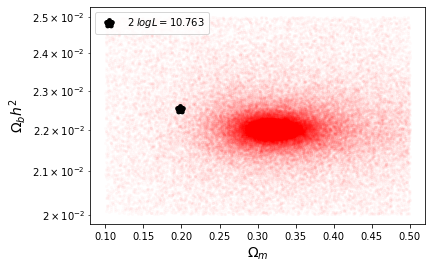

In [39]:
plt.scatter(samples[:,0],samples[:,1], marker='.', linewidth=1e-5, alpha=0.02, c='r')
plt.xlabel('$\Omega_m$', fontsize=14)
plt.ylabel(r'$\Omega_bh^2$', fontsize=14)
plt.yscale('log')
# plt.xscale('log')
plt.scatter(samples[r][0], samples[r][1],marker='*', linewidth=5, c='black',\
            alpha=1.0, label='$2\;logL={:.3f}$'.format(likes[r]))
plt.legend()

In [40]:
predictions = network.predict(samples)

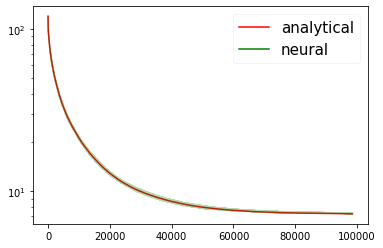

In [41]:

plt.plot(likes, label='analytical', c='red')
plt.plot(predictions, alpha=0.3, label='neural', c='green')
plt.yscale('log')
# plt.xlim(50000,100000)
leg = plt.legend(fontsize=15, framealpha=0.2)

for lh in leg.legendHandles: 
    lh.set_alpha(1)

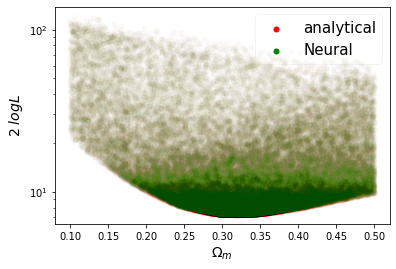

In [42]:
plt.scatter(samples[:,0],likes, linewidth=1e-5, alpha=0.01, c='red', label='analytical')
plt.scatter(samples[:,0],predictions, linewidth=1e-5, alpha=0.02, c='green', label='Neural')

plt.xlabel('$\Omega_m$', fontsize=14)
plt.ylabel(r'$2\;logL$', fontsize=14)
plt.yscale('log')

leg = plt.legend(fontsize=15, framealpha=0.2)

for lh in leg.legendHandles: 
    lh.set_alpha(1)

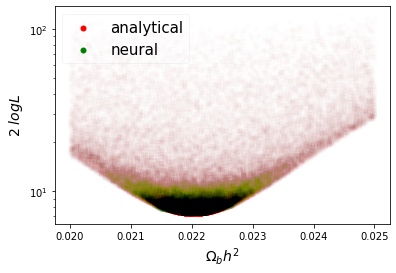

In [43]:
plt.scatter(samples[:,1],likes, linewidth=1e-7, alpha=0.002, marker='o', c='red', label='analytical')
plt.scatter(samples[:,1],predictions, linewidth=1e-7, alpha=0.002, marker='o', c='green', label='neural')
plt.xlabel('$\Omega_bh^2$', fontsize=14)
plt.ylabel(r'$2\;logL$', fontsize=14)
plt.yscale('log')

leg = plt.legend(fontsize=15, framealpha=0.2)

for lh in leg.legendHandles: 
    lh.set_alpha(1)

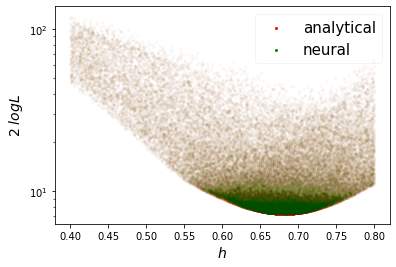

In [44]:
plt.scatter(samples[:,2],likes,marker='.', linewidth=1e-2, alpha=0.02, label='analytical', c='red')
plt.scatter(samples[:,2],predictions,marker='.', linewidth=1e-2, alpha=0.02, c='green', label='neural')
plt.xlabel('$h$', fontsize=14)
plt.ylabel(r'$2\;logL$', fontsize=14)
plt.yscale('log')

leg = plt.legend(fontsize=15, framealpha=0.2)

for lh in leg.legendHandles: 
    lh.set_alpha(1)

In [48]:
# network.save_model('models/hzlike.h5')

Model models/hzlike.h5 saved!
